# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-19-trescuerpos_aplicaciones.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del problema de los tres cuerpos: aplicaciones

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [1]:
!pip install -Uq pymcel

In [26]:
import pymcel as pc
pc.obtiene_datos()

# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

Descargando kernel 'de430.bsp' en 'pymcel/'...
El kernel 'de430.bsp' ya fue descargado
Descargando kernel 'de430_tech-comments.txt' en 'pymcel/'...
El kernel 'de430_tech-comments.txt' ya fue descargado
Descargando kernel 'latest_leapseconds.tls' en 'pymcel/'...
El kernel 'latest_leapseconds.tls' ya fue descargado
Descargando kernel 'naif0012.tls' en 'pymcel/'...
El kernel 'naif0012.tls' ya fue descargado
Descargando kernel 'earth_latest_high_prec.bpc' en 'pymcel/'...
El kernel 'earth_latest_high_prec.bpc' ya fue descargado
Descargando kernel 'earth_fixed.tf' en 'pymcel/'...
El kernel 'earth_fixed.tf' ya fue descargado
Descargando kernel 'gm_de431.tpc' en 'pymcel/'...
El kernel 'gm_de431.tpc' ya fue descargado
Descargando kernel 'pck00011.tpc' en 'pymcel/'...
El kernel 'pck00011.tpc' ya fue descargado
Descargando kernel 'de430.tpc' en 'pymcel/'...
El kernel 'de430.tpc' ya fue descargado
Copiando archivos de datos...
The autoreload extension is already loaded. To reload it, use:
  %reloa

### El radio de Hill y el lóbulo de Roche

Texto descriptivo Calculemos, por ejemplo, el valor del potencial modificado (o la constante de Jacobi) para una partícula que se encuentra justamente sobre el punto de Lagrange $L_1$.  Para ello necesitamos primero calcular de forma muy precisa la posición de este punto sobre el eje $x$:

In [2]:
#Parámetro del sistema
alfa=0.0001

#Posición del punto L1
from scipy.optimize import bisect
from pymcel.export import funcion_puntos_colineales
xL1=bisect(funcion_puntos_colineales,0,1-alfa-0.5*(alfa/3)**(1/3),args=(alfa,))
xL2=bisect(funcion_puntos_colineales,1-0.5*alfa,2,args=(alfa,))

print(f"Posición de L_1 : {xL1}")
print(f"Posición de L_2 : {xL2}")

Posición de L_1 : 0.9680652061467218
Posición de L_2 : 1.032425191688064


El valor de la constante de Jacobi y el potencial modificado será entonces:

In [3]:
from numpy import array
from pymcel.export import constante_jacobi
CJ_L1=constante_jacobi(alfa,[[xL1,0,0]],[[0,0,0]])[0]
Vmod_L1=-CJ_L1/2

print(f"Constante de Jacobi = {CJ_L1}")
print(f"Potencial modificado = {Vmod_L1}")

Constante de Jacobi = 3.0089892451448557
Potencial modificado = -1.5044946225724278


Hagamos ahora un gráfico del potencial modificado, resaltando, la curva equipotencial correspondiente a al valor específico calculado anteriormente y la posición de los puntos de Lagrange $L_1$ y $L_2$:

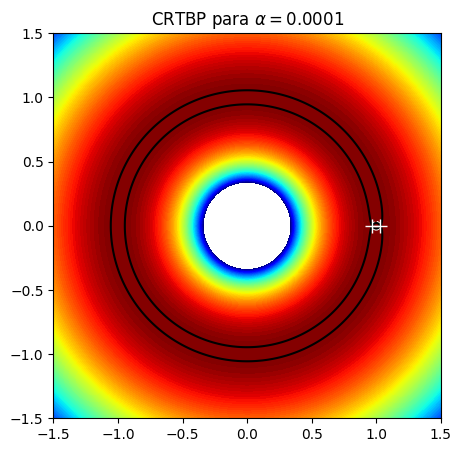

In [4]:
#Malla coordenada
from numpy import meshgrid,zeros_like,linspace
rango=1.5
NG=500
X,Y=meshgrid(linspace(-rango,rango,NG),
             linspace(-rango,rango,NG))
Z=zeros_like(X)

#Distancia relativa
from numpy import sqrt
r1=sqrt((X+alfa)**2+Y**2+Z**2)
r2=sqrt((X-1+alfa)**2+Y**2+Z**2)

#Calcula el potencial
Vmod=-(1-alfa)/r1-alfa/r2-0.5*(X**2+Y**2)

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

#Contornos
ax.contour(X,Y,Vmod,levels=[Vmod_L1],colors='k',linestyles='solid');
c=ax.contourf(X,Y,Vmod,levels=linspace(-3,Vmod.max(),100),cmap="jet");
#fig.colorbar(c)

#Posición de los puntos de Lagrange
#"""
ax.plot([xL1],[0],'w+',ms=10);
ax.plot([xL2],[0],'w+',ms=10);

#Esfera de Hill
from matplotlib.patches import Circle
ax.add_patch(Circle([1-alfa,0],(alfa/3)**(1./3),
                    color='w',fill=None,linestyle='--'));

ax.set_title(f"CRTBP para $\\alpha={alfa}$");

El Radio de Hill del sistema Sol-Tierra:

In [5]:
#Lee las masas de los planetas
from spiceypy import furnsh
furnsh("pymcel/data/de430.tpc")

#Constante de gravitación universal 
G=6.67e-20 # km^3 / kg s^2

#Masa de la Tierra y el sol
from spiceypy import bodvrd
mutierra=bodvrd("EARTH","GM",1)[1][0]
musol=bodvrd("SUN","GM",1)[1][0]

#Parámetro alfa
alfa=mutierra/(mutierra+musol)

print(f"Sistema Sol-Tierra, alfa = {alfa}")

a=1.496e8 #km
RH_Tierra=a*(alfa/3)**(1./3)

print(f"Radio de Hill de la Tierra, R_H = {RH_Tierra:e}")

Sistema Sol-Tierra, alfa = 3.0404234038181026e-06
Radio de Hill de la Tierra, R_H = 1.502689e+06


 En el algoritmo a continuación se calcula el radio de Hill de los planetas del Sistema Solar:

In [6]:
#Cargamos las efemérides de los planetas
furnsh("pymcel/data/de430.bsp")

planetas=["MERCURY_BARYCENTER","VENUS_BARYCENTER",
                "EARTH",
                "MARS_BARYCENTER",
                "JUPITER_BARYCENTER","SATURN_BARYCENTER",
                "URANUS_BARYCENTER","NEPTUNE_BARYCENTER"]

#Masa de la Tierra y el sol
RH=dict()
for planeta in planetas:
    #Parámetro de masa
    muplaneta=bodvrd(planeta,"GM",1)[1][0]

    #Parámetro alfa
    alfa=muplaneta/(muplaneta+musol)

    #Semieje mayor
    from spiceypy import spkezr,oscltx
    xplaneta,tluz=spkezr(planeta,0,"J2000","None","SUN")
    elementos=oscltx(xplaneta,0,musol)
    aplaneta=elementos[9]
    
    #Radio de Hill
    RH[planeta]=aplaneta*(alfa/3)**(1./3)

for planeta in planetas:
    print(f"Radio de Hill de {planeta.split('_')[0]}: {RH[planeta]/1e6} millones de km")    

Radio de Hill de MERCURY: 0.22067450795455779 millones de km
Radio de Hill de VENUS: 1.0111476710161926 millones de km
Radio de Hill de EARTH: 1.5033470375472335 millones de km
Radio de Hill de MARS: 1.0840564936087809 millones de km
Radio de Hill de JUPITER: 53.19417610097791 millones de km
Radio de Hill de SATURN: 65.48868970009971 millones de km
Radio de Hill de URANUS: 70.23685638894752 millones de km
Radio de Hill de NEPTUNE: 116.187691712555 millones de km


En el algoritmo a continuación se consignan las propiedades de este cuerpo y de su planeta central, Saturno y se calcula el radio de Hill: 

In [12]:
m1=5.7e26 #Masa del planeta, kg
m2=4.2e15 #Masa del satélite, kg
a=130000 #Distancia media a Saturno, km
Rs=16 #Radio del satélite, km, 

#Parámetro del CRTBP
alfa=m2/(m1+m2)

#Radio de Hill
RH=a*(alfa/3)**(1./3)

print(f"Radio de Hill de Pan = {RH}")

Radio de Hill de Pan = 17.53992555057494


Podemos analizar el caso de Pan a la luz del recién definido límite de Roche.  Para calcularlo debemos conocer la densidad del planeta, su radio y la densidad del satélite:

In [13]:
Rp=5.8e4 #Radio de Saturno, km

#Densidad promedio de Saturno
from numpy import pi
rhop=m1/(4*pi*(Rp*1e3)**3/3)
rhos=m2/(4*pi*(Rs*1e3)**3/3)

#Límite de Roche de Saturno para cuerpos con la densidad de Pan
aR=3**(1/3)*(rhop/rhos)**(1/3)*Rp

print(f"Densidad media de Saturno: {rhop} kg/m^3")
print(f"Densidad media de Pan: {rhos} kg/m^3")
print(f"Límite de Roche de Saturno: {aR} km")
print(f"Distancia de Pan a Saturno: {a} km")

Densidad media de Saturno: 697.4326353252005 kg/m^3
Densidad media de Pan: 244.79397985325699 kg/m^3
Límite de Roche de Saturno: 118586.59228611788 km
Distancia de Pan a Saturno: 130000 km


### Órbitas periódicas cerca a los puntos de equilibrio

Rutina para cálcular y graficar las órbitas en el CRTBP:

In [14]:
def orbitas_crtbp(alfa,ro,vo,
                  T=100,Nt=1000,
                  xlim=(-1.5,1.5),ylim=(-1.5,1.5),
                  xL=0,yL=0,
                 ):
    #Tiempos de integración
    from numpy import linspace
    ts=linspace(0,T,Nt)
    #Solución numérica a la ecuación de movimiento
    from pymcel.export import crtbp_solucion
    solucion=crtbp_solucion(alfa,ro,vo,ts)
    #Posiciones y velocidades en el sistema rotante
    rs=solucion[0]
    vs=solucion[1]
    #Gráfico
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(5,5))
    ax=fig.gca()
    ax.plot(rs[:,0],rs[:,1],'k-')
    ax.plot([-alfa],[0],'ro',ms=10)
    ax.plot([1-alfa],[0],'bo',ms=5)
    #Punto de Lagrange
    ax.plot([xL],[yL],'r+',ms=10)
    #Decoración
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()
    return fig

En el algoritmo a continuación se muestra una de esas trayectorias, tal y como fue encontrada por Grebow (2006):

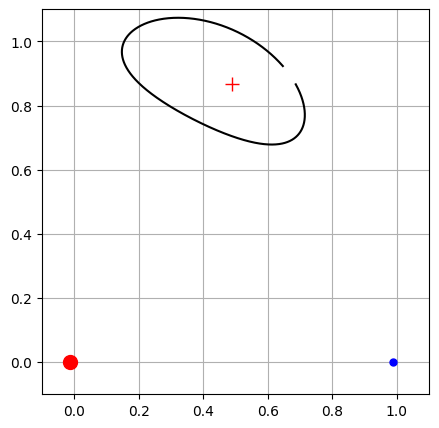

In [15]:
#Propiedades del sistema
alfa=0.0121505856
xL4=0.5-alfa
yL4=3**0.5/2
#Condiciones iniciales
ro=[0.6867,yL4,0]
vo=[0.1126,-0.2040,0]
from numpy import pi
fig=orbitas_crtbp(alfa,ro,vo,
              T=2*pi,Nt=1000,
              xlim=(-0.1,1.1),ylim=(-0.1,1.1),
              xL=xL4,yL=yL4)

Una familia muy interesante de trayectorias, se encuentra considerando condiciones iniciales cercanas al punto  L3
 . Considere por ejemplo el siguiente ejemplo:

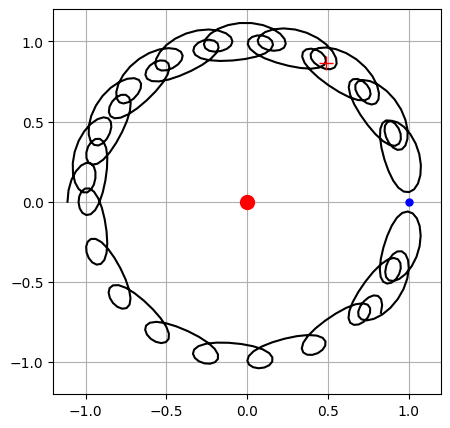

In [16]:
#Propiedades del sistema
alfa=1e-4
from scipy.optimize import bisect
from pymcel import funcion_puntos_colineales
xL3=bisect(funcion_puntos_colineales,-2,-0.5,args=(alfa,))
#Condiciones iniciales
ro=[-1.112349859300,0,0]
vo=[0,+0.202041957868,0]
fig=orbitas_crtbp(alfa,ro,vo,
              T=180,Nt=500,
              xlim=(-1.2,1.2),ylim=(-1.2,1.2),
              xL=xL4,yL=yL4)

Rutina para calcular y graficar las órbitas en 3D: 

In [23]:
def orbitas_crtbp3d(alfa,ro,vo,
                  T=100,Nt=1000,
                  xlim=(-1.5,1.5),ylim=(-1.5,1.5),zlim=(-1.5,1.5),
                  xL=0,yL=0,zL=0,
                  elevation=10,azimuth=-80
                 ):
    #Tiempos de integración
    from numpy import linspace
    ts=linspace(0,T,Nt)
    #Solución numérica a la ecuación de movimiento
    from pymcel.export import crtbp_solucion
    solucion=crtbp_solucion(alfa,ro,vo,ts)
    #Posiciones y velocidades en el sistema rotante
    rs=solucion[0]
    vs=solucion[1]
    #Gráfico
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_subplot(111,projection='3d')
    ax.plot(rs[:,0],rs[:,1],rs[:,2],'k-')
    ax.plot([-alfa],[0],[0],'ro',ms=10)
    ax.plot([1-alfa],[0],[0],'bo',ms=5)
    ax.plot([xL],[yL],[zL],'r+',ms=10)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    ax.view_init(elevation,azimuth)
    fig.tight_layout()
    return fig

Un ejemplo de una trayectoria periódica relacionada con el punto $L_1$ se demuestra en este sistema:

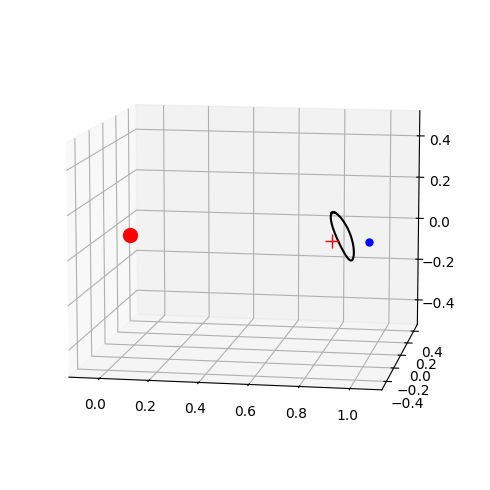

In [24]:
#Propiedades del sistema
alfa=0.0121505856
xL1=bisect(funcion_puntos_colineales,0,1-2*alfa,args=(alfa,))
#Condiciones iniciales
ro=[0.8329,0,0.1304]
vo=[0,0.2437,0]
fig=orbitas_crtbp3d(alfa,ro,vo,
                T=3,Nt=100,
                xlim=(-0.1,1.1),ylim=(-0.5,0.5),zlim=(-0.5,0.5),
                xL=xL1,yL=0,zL=0
               )

Una órbita halo alrededor el punto de Lagrange $L_2$ se muestra a continuación:

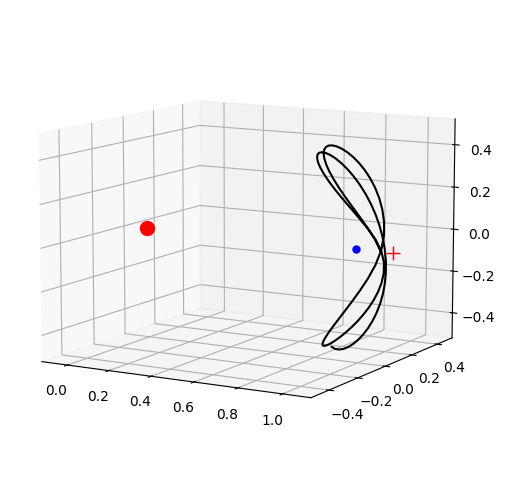

In [25]:
#Propiedades del sistema
alfa=0.0121505856
xL2=bisect(funcion_puntos_colineales,1-0.5*alfa,2,args=(alfa,))
#Condiciones iniciales
ro=[1.1003,0,0]
vo=[0,-0.3217,0.5973]
fig=orbitas_crtbp3d(alfa,ro,vo,
                T=10,Nt=100,
                xlim=(-0.1,1.1),ylim=(-0.5,0.5),zlim=(-0.5,0.5),
                xL=xL2,yL=0,zL=0,
                elevation=10,azimuth=-60
               )

### El parámetro de Tisserand

Un sistema de ejemplo:

In [7]:
sistema=[
    #Partícula de prueba
    dict(
        m=1e-5,
        r=[6.0,0,-0.1],
        v=[0,2.0,0.1]
    ),
    # Particula 1
    dict(
        m=1000.0,
        r=[-0.005,0,0],
        v=[0,-7.075,0]
    ),
    # Particula 2
    dict(
        m=1.0,
        r=[4.995,0,0],
        v=[0,+7.075,0]
    ),
]

Resolvamos las ecuaciones de movimiento y grafiquemos la trayectoria respecto al centro de masa:

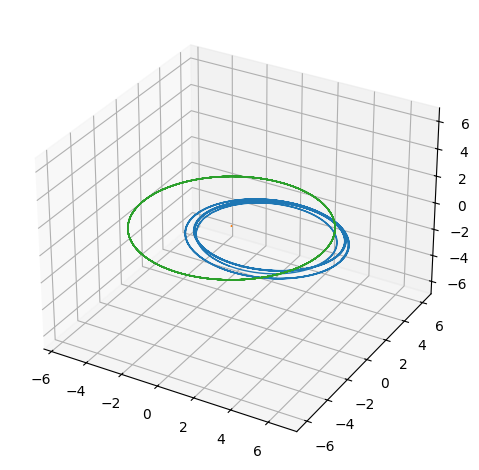

In [8]:
T=20.0
Nt=1000
from numpy import linspace
ts=linspace(0,T,Nt)
from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps,vps);
ax=fig.gca()

Calculemos los elementos orbitales principales ($a$, $e$, $i$) de la partícula de prueba con respecto a la partícula central y veamos cómo cambian en el tiempo:

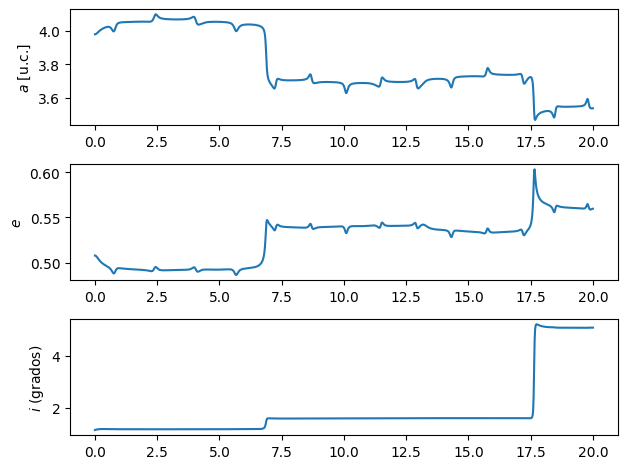

In [9]:
#Parámetro gravitacional del sistema
mu=sistema[1]["m"]+sistema[2]["m"]

#Cálculo 
elts=[]
for i in range(Nt):
    #Vector de estado en el tiempo i-esimo
    from numpy import concatenate
    state=concatenate((rps[0,i,:],vps[0,i,:]))
    #Convierte el vector de estado a elementos orbitales
    from spiceypy import oscltx
    elementos=oscltx(state,0,mu)
    from numpy import pi
    elts+=[[elementos[9],elementos[1],elementos[2]]]
from numpy import array
elts=array(elts)
    
#Gráfico
import matplotlib.pyplot as plt
fig,axs=plt.subplots(3,1)
axs[0].plot(ts,elts[:,0])
axs[0].set_ylabel('$a$ [u.c.]')
axs[1].plot(ts,elts[:,1])
axs[1].set_ylabel('$e$')
axs[2].plot(ts,elts[:,2]*180/pi)
axs[2].set_ylabel('$i$ (grados)')
fig.tight_layout()

Veámos ahora qué ocurre si nos pasamos a un marco de referencia rotante que tenga exactamente la misma velocidad angular del planeta alrededor del cuerpo central:

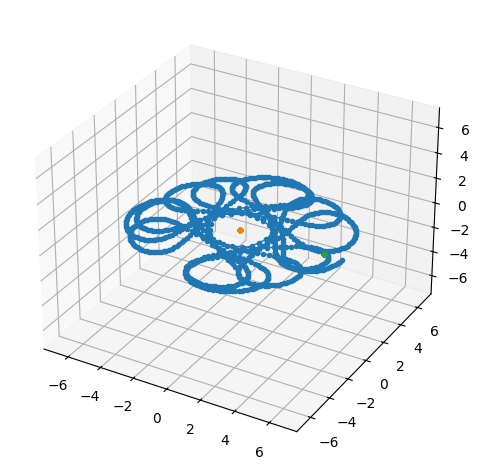

In [10]:
#Distancia entre las partículas 1 y 2
from numpy.linalg import norm
r12=norm(rps[1]-rps[2],axis=1)

#Promedio
a_P=r12.mean()

#Velocidad angular del planet
from numpy import sqrt
m1=sistema[1]["m"]
m2=sistema[2]["m"]
n=sqrt((m1+m2)/a_P**3)

#Velocidad angular
w=n
from numpy import array
omega=array([0,0,w])

#Vectores en el sistema rotado
from numpy import zeros_like
rps_rot=zeros_like(rps)
vps_rot=zeros_like(vps)
for i in range(Nt):

    #Matriz de rotación
    from spiceypy import rotate,mxv
    R=rotate(w*ts[i],3)

    #Rota las posiciones y velocidades de cada partícula
    for n in range(3):
        rps_rot[n,i]=mxv(R,rps[n,i])
        #v' = v + w x r
        from spiceypy import vcrss
        vps_rot[n,i]=mxv(R,vps[n,i]-vcrss(omega,rps[n,i]))
        
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps_rot,vps_rot,marker='o',ms=3);

En el marco de referencia rotante, la partícula de prueba esta lejos de describir una trayectoria arbitraria.  Esto era de esperarse: dado que el planeta tiene una órbita casi circular vemos que las condiciones básicas del CRTBP se cumplen en el sistema y podemos aplicar lo que hemos aprendido para analizar el problema.  Comencemos por ejemplo calculando la constante de Jacobi asociada con el movimiento de la partícula: 

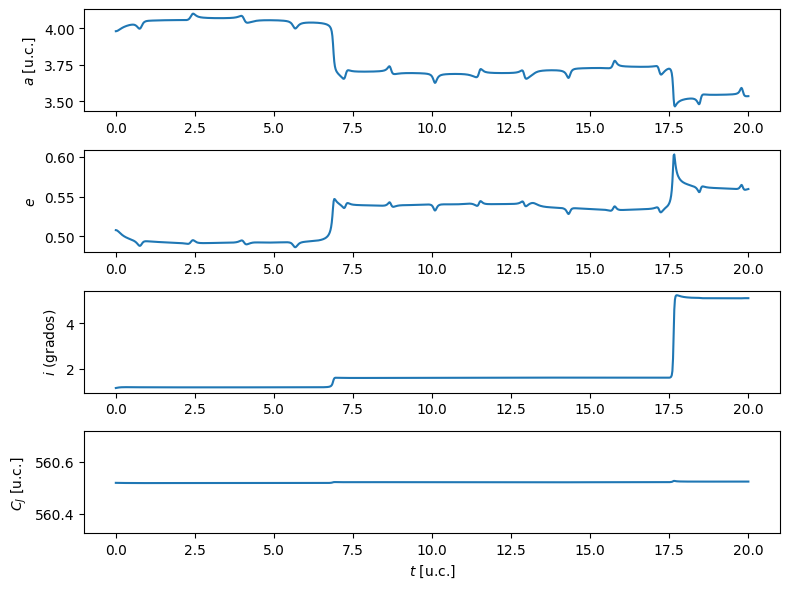

In [11]:
#Posiciones de la partícula de prueba
r=rps_rot[0]

#Posiciones y velocidades relativas a las partículas masivas
from numpy.linalg import norm
r1=norm(rps_rot[0]-rps_rot[1],axis=1)
r2=norm(rps_rot[0]-rps_rot[2],axis=1)

#Rapideces
v=norm(vps_rot[0],axis=1)

#Parametros gravitacionales
mu1=m1
mu2=m2

#Cuadratura de Jacobi
CJ=2*mu1/r1+2*mu2/r2+w**2*(r[:,0]**2+r[:,1]**2)-v**2

#Parámetro gravitacional del sistema
mu=sistema[1]["m"]+sistema[2]["m"]

#Cálculo 
elts=[]
for i in range(Nt):
    #Vector de estado en el tiempo i-esimo
    from numpy import concatenate
    state=concatenate((rps[0,i,:],vps[0,i,:]))
    #Convierte el vector de estado a elementos orbitales
    from spiceypy import oscltx
    elementos=oscltx(state,0,mu)
    from numpy import pi
    elts+=[[elementos[9],elementos[1],elementos[2]]]
from numpy import array
elts=array(elts)
    
#Gráfico
import matplotlib.pyplot as plt
fig,axs=plt.subplots(4,1,figsize=(8,6))
axs[0].plot(ts,elts[:,0])
axs[0].set_ylabel('$a$ [u.c.]')
axs[1].plot(ts,elts[:,1])
axs[1].set_ylabel('$e$')
axs[2].plot(ts,elts[:,2]*180/pi)
axs[2].set_ylabel('$i$ (grados)')
fig.tight_layout()

#Grafico
ax=axs[3]
ax.plot(ts,CJ)
ax.set_xlabel("$t$ [u.c.]");
ax.set_ylabel("$C_J$ [u.c.]");
ax.set_ylim((CJ.mean()-100*CJ.std(),CJ.mean()+100*CJ.std()));

fig.tight_layout()

Si queremos poner a prueba el resultado anterior con el sistema que estudiamos al principio de esta sección, es necesario primero convertir los valores de las cantidades calculadas anteriormente al sistema de unidades del problema del CRTBP. Para ello primero hay que definir y calcular los factores de conversión respectivos:

In [12]:
UM=m1+m2
UL=a_P
from numpy import sqrt
UT=sqrt(UL**3/UM)
UV=UL/UT

print(f"U_M = {UM}")
print(f"U_L = {UL}")
print(f"U_T = {UT}")
print(f"U_V = {UV}")

U_M = 1001.0
U_L = 5.0005637747559994
U_T = 0.35343651552153577
U_V = 14.148407295655625


La constante de Jacobi en unidades canónicas será entonces:

In [13]:
CJ_uc=CJ/UV**2

from numpy import set_printoptions
set_printoptions(threshold=11,precision=3,suppress=True)
print(f"CJ (unidades canónicas) = {CJ_uc}")

CJ (unidades canónicas) = [2.8 2.8 2.8 ... 2.8 2.8 2.8]


Calculemos ahora el parámetro de Tisserand en unidades canónicas:

In [14]:
a_uc=elts[:,0]/UL
e_uc=elts[:,1]
i_uc=elts[:,2]

from numpy import sqrt,cos
T=1/a_uc+2*cos(i_uc)*sqrt(a_uc*(1-e_uc**2))

from numpy import set_printoptions
set_printoptions(threshold=11,precision=3,suppress=True)
print(f"T (unidades canónicas) = {T}")

T (unidades canónicas) = [2.793 2.793 2.794 ... 2.803 2.803 2.803]


El valor de $T$ coincide aproximadamente con el de $C_J$ como era de esperarse.  Una comparación más justa puede hacerse si graficamos ambas cantidades:

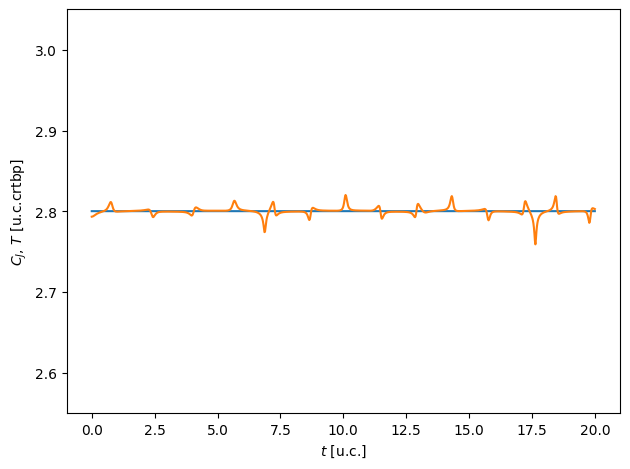

In [15]:
fig=plt.figure()
ax=fig.gca()
ax.plot(ts,CJ_uc)
ax.plot(ts,T)
ax.set_xlabel("$t$ [u.c.]");
ax.set_ylabel("$C_J$, $T$ [u.c.crtbp]");
ax.set_ylim((T.mean()-50*T.std(),
             T.mean()+50*T.std()));
fig.tight_layout()

### Clasificación de objetos cercanos a la Tierra

Leamos los datos de los NEOs

In [21]:
from pandas import read_csv
datos=read_csv("pymcel/data/NEOs.csv",index_col=["full_name"],skiprows=1)
datos.head(3)


,q,e,i,w,om
full_name,,,,,
433 Eros (1898 DQ),1.132973,0.222951,10.830543,178.882294,304.299327
719 Albert (1911 MT),1.196452,0.546558,11.567485,156.176338,183.866950
887 Alinda (1918 DB),1.062886,0.570332,9.393854,350.495585,110.434218


En el algoritmo a continuación calculamos el valor de T para todos los NEOs:

In [23]:
datos["a"]=datos["q"]/(1-datos["e"])
from numpy import cos,sqrt,pi
datos["T"]=1/datos["a"]+2*cos(datos["i"]*pi/180)*\
           sqrt(datos["a"]*(1-datos["e"]**2))

datos[["a","e","i","T"]].head(3)

,a,e,i,T
full_name,,,,
433 Eros (1898 DQ),1.458046,0.222951,10.830543,2.998120
719 Albert (1911 MT),2.638602,0.546558,11.567485,3.044307
887 Alinda (1918 DB),2.473737,0.570332,9.393854,2.953457


Un gráfico de dispersión de los datos, se puede hacer con el siguiente algoritmo:

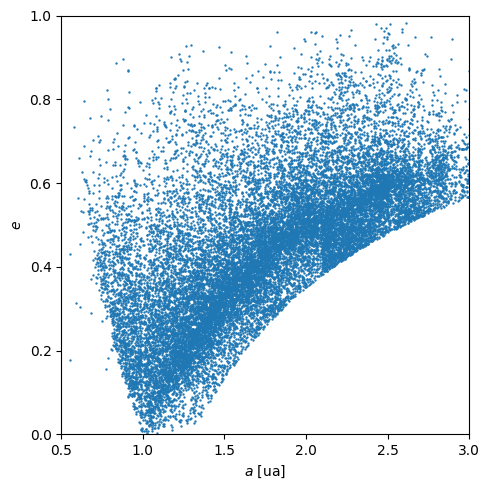

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
s=ax.scatter(datos["a"],datos["e"],s=0.5)
ax.set_xlim((0.5,3.0))
ax.set_ylim((0.0,1.0))
ax.set_xlabel("$a$ [ua]")
ax.set_ylabel("$e$")
fig.tight_layout()

Graficamos ahora la curva correspondiente a un valor constante del parámetro de Tisserand:

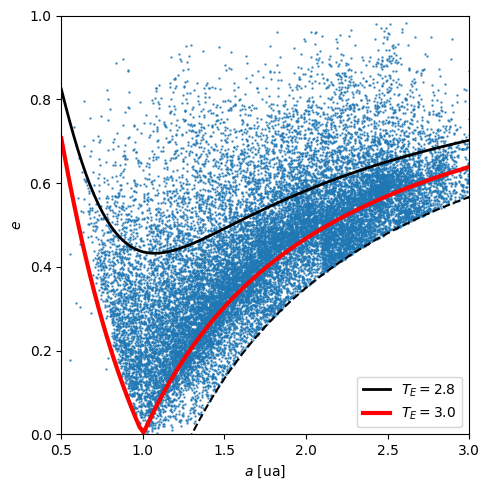

In [25]:
fig=plt.figure(figsize=(5,5))

#Dispersión de puntos
ax=fig.gca()
cond=datos["T"]>0.5
s=ax.scatter(datos[cond]["a"],datos[cond]["e"],
             s=0.5,alpha=0.8)

#Límite de la dispersión por definición de NEOs
from numpy import linspace,sqrt
aes=linspace(0.5,3.0,100)
eLs=1-1.3/aes
ax.plot(aes,eLs,'k--')

#Objetos con igual valor de T
T=2.8
eTs=sqrt(1-1/(4*aes**3)*(T*aes-1)**2)
ax.plot(aes,eTs,'k-',lw=2,label=f"$T_E={T}$")
T=3.0
eTs=sqrt(1-1/(4*aes**3)*(T*aes-1)**2)
ax.plot(aes,eTs,'r-',lw=3,label=f"$T_E={T}$")

#Decoración
ax.set_xlim((0.5,3.0))
ax.set_ylim((0.0,1.0))
ax.set_xlabel("$a$ [ua]")
ax.set_ylabel("$e$")
ax.legend()
fig.tight_layout()

### Clasificación de los objetos cercanos a Júpiter


Con el algoritmo a continuación se leen los elementos órbitales de estos cuerpos y se grafican en el plano $a-e$.  Además incluímos la curva de igual valor del parámetro de Tisserand $T_J=3$:

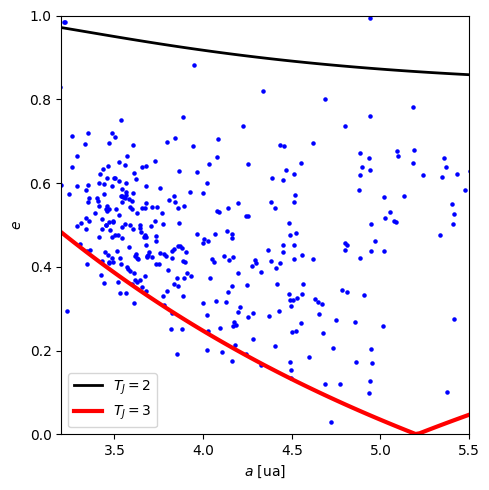

In [27]:
#Lee objetos
from pandas import read_csv
datos=read_csv("pymcel/data/JupiterComets.csv",
               index_col=["full_name"],skiprows=1)
datos["a"]=datos["q"]/(1-datos["e"])

#Gráfico de dispersión
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
s=ax.scatter(datos["a"],datos["e"],
             s=5,c='b')

#Contorno de paraámetro de Tisserand
aJ=5.2044
from numpy import linspace,sqrt
aes=linspace(3.2,5.5,100)
T=2
eTs=sqrt(1-1/(4*(aes/aJ)**3)*(T*(aes/aJ)-1)**2)
ax.plot(aes,eTs,'k-',lw=2,label=f"$T_J={T}$")
T=3
eTs=sqrt(1-1/(4*(aes/aJ)**3)*(T*(aes/aJ)-1)**2)
ax.plot(aes,eTs,'r-',lw=3,label=f"$T_J={T}$")

#Decoración
ax.set_xlim((3.2,5.5))
ax.set_ylim((0.0,1.0))
ax.set_xlabel("$a$ [ua]")
ax.set_ylabel("$e$")
ax.legend(loc='lower left')
fig.tight_layout()

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)